**Cafe in Queens**

**Introduction**<br>
In this project, we will how convert addresses into their equivalent latitude and longitude values. Also, we will use
the Foursquare API to explore neighborhoods in New York City. We will use the explore function to get the most
common venue categories in each neighborhood, and then use this feature to group the neighborhoods into
clusters. Then we will use the k-means clustering algorithm to complete this task. Finally, we will use the Folium
library to visualize the neighborhoods in New York City and their emerging clusters.

Table of Contents<br>
Introduction<br>
1. Importing Libraries<br>
2. Data Understanding and Preparation<br>
3. Cleaning Of Data<br>
4. Exploring Neighborhoods in Queens<br>
5. Analyze Each Neighborhood<br>
6. Cluster Neighborhoods<br>
7. Examine clusters<br>

**1. Importing Libraries:**

In [4]:
!conda install -c conda-forge beautifulsoup4 --yes
!conda install -c conda-forge folium=0.5.0 --yes
print('Libraries installed!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.5

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.7.1       |        py37_1001         140 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    soupsieve-1.9.2            |           py37_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  beautifulsoup4     conda-forge/linux-64::beautifulsoup4-4.7.1-py37_1001
  soupsieve          conda-forge/linux-64::

In [5]:
pip install geocoder

     |████████████████████████████████| 102kB 4.5MB/s ta 0:00:01
     |████████████████████████████████| 829kB 14.8MB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [6]:
# use the inline backend to generate the plots within the browser
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [14]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.5

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.5

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


**2.Data Understanding and Preparation**

In [35]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [36]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [37]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [47]:
neighborhoods_data = newyork_data['features']

In [48]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [49]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [50]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [51]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [52]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [53]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [54]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


**Create a map of New York with neighborhoods superimposed on top.**

In [55]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

**Let's simplify the above map and segment and cluster only the neighborhoods in Queens. So let's slice
the original dataframe and create a new dataframe of the Queens data.**

In [56]:
Queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [57]:
address = 'Queens, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.6524927, -73.7914214158161.


In [58]:
# create map of Queens using latitude and longitude values
map_Queens = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
for lat, lng, label in zip(Queens_data['Latitude'], Queens_data['Longitude'], Queens_data[ 'Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Queens)  
    
map_Queens

**4.Data Modelling**<br>
**Define Foursquare Credentials and Version**

In [59]:
CLIENT_ID = 'HZWQATJKJFBOW35GMHRSYLLJ5UG4HHYVT0NINAR4VFASGSY0' # your Foursquare ID
CLIENT_SECRET = '0QOE2DPPCVSYUBN1UN3JOMHNHGP5EUKXP3PQHBV534DWDKKO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HZWQATJKJFBOW35GMHRSYLLJ5UG4HHYVT0NINAR4VFASGSY0
CLIENT_SECRET:0QOE2DPPCVSYUBN1UN3JOMHNHGP5EUKXP3PQHBV534DWDKKO


In [60]:
Queens_data.loc[0, 'Neighborhood']

'Astoria'

In [61]:
neighborhood_latitude = Queens_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Queens_data.loc[0, 'Longitude'] # neighborhood longitude value
neighborhood_name = Queens_data.loc[0, 'Neighborhood'] # neighborhood name
print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name,
                                                               neighborhood_latitude,
                                                                  neighborhood_longitude))

Latitude and longitude values of Astoria are 40.76850859335492, -73.91565374304234.


In [62]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
CLIENT_ID,
CLIENT_SECRET,
VERSION,
neighborhood_latitude,
neighborhood_longitude,
radius,
LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=HZWQATJKJFBOW35GMHRSYLLJ5UG4HHYVT0NINAR4VFASGSY0&client_secret=0QOE2DPPCVSYUBN1UN3JOMHNHGP5EUKXP3PQHBV534DWDKKO&v=20180605&ll=40.76850859335492,-73.91565374304234&radius=500&limit=100'

In [63]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d2c62c7bf7dde002c2021bb'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Astoria',
  'headerFullLocation': 'Astoria, Queens',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 109,
  'suggestedBounds': {'ne': {'lat': 40.773008597854925,
    'lng': -73.90972309237958},
   'sw': {'lat': 40.76400858885492, 'lng': -73.9215843937051}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bdf502a89ca76b062b75d5e',
       'name': 'Favela Grill',
       'location': {'address': '33-18 28th Ave',
        'crossStreet': 'btwn 33rd & 34th St.',
        'lat': 40.76734843380796,
        'lng': -73.9178974

In [64]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [65]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Favela Grill,Brazilian Restaurant,40.767348,-73.917897
1,CrossFit Queens,Gym,40.769404,-73.918977
2,Titan Foods Inc.,Gourmet Shop,40.769198,-73.919253
3,Orange Blossom,Gourmet Shop,40.769856,-73.917012
4,Simply Fit Astoria,Gym,40.769114,-73.912403


In [66]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


**5. Explore Neighborhoods in Queens**

In [68]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [69]:
Queens_venues = getNearbyVenues(names=Queens_data['Neighborhood'],
                                                     latitudes=Queens_data['Latitude'],
                                                        longitudes=Queens_data['Longitude']
                                     )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [70]:
print(Queens_venues.shape)
Queens_venues.head()

(2180, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
4,Astoria,40.768509,-73.915654,Simply Fit Astoria,40.769114,-73.912403,Gym


In [71]:
Queens_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arverne,18,18,18,18,18,18
Astoria,100,100,100,100,100,100
Astoria Heights,13,13,13,13,13,13
Auburndale,18,18,18,18,18,18
Bay Terrace,40,40,40,40,40,40
Bayside,70,70,70,70,70,70
Bayswater,2,2,2,2,2,2
Beechhurst,16,16,16,16,16,16
Bellaire,12,12,12,12,12,12


In [72]:
print('There are {} uniques categories.'.format(len(Queens_venues['Venue Category'].unique
())))

There are 273 uniques categories.


**6. Analyze Each Neighborhood**

In [73]:
# one hot encoding
Queens_onehot = pd.get_dummies(Queens_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
Queens_onehot['Neighborhood'] = Queens_venues['Neighborhood']
# move neighborhood column to the first column
fixed_columns = [Queens_onehot.columns[-1]] + list(Queens_onehot.columns[:-1])
Queens_onehot = Queens_onehot[fixed_columns]
Queens_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Club,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Sto

In [74]:
Queens_onehot.shape

(2180, 273)

In [75]:
Queens_grouped = Queens_onehot.groupby('Neighborhood').mean().reset_index()
Queens_grouped
print(Queens_grouped .shape)
Queens_grouped .head(10)

(81, 273)


,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Club,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Sto

**Let us assume our customer wants to open either an Italian Restaurant or an Indian Restaurant**

In [78]:
print(len(Queens_grouped[Queens_grouped["Italian Restaurant"] > 0]))
print(len(Queens_grouped[Queens_grouped["Indian Restaurant"] > 0]))

25
13


In [89]:
Queens_grouped = Queens_grouped[["Neighborhood","Italian Restaurant", "Indian Restaurant"]]

In [90]:
Queens_grouped.head()

,Neighborhood,Italian Restaurant,Indian Restaurant
0,Arverne,0.000000,0.00
1,Astoria,0.020000,0.02
2,Astoria Heights,0.153846,0.00
3,Auburndale,0.055556,0.00
4,Bay Terrace,0.000000,0.00


In [91]:
num_top_venues = 5
for hood in Queens_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Queens_grouped[Queens_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arverne----
                venue  freq
0  Italian Restaurant   0.0
1   Indian Restaurant   0.0


----Astoria----
                venue  freq
0  Italian Restaurant  0.02
1   Indian Restaurant  0.02


----Astoria Heights----
                venue  freq
0  Italian Restaurant  0.15
1   Indian Restaurant  0.00


----Auburndale----
                venue  freq
0  Italian Restaurant  0.06
1   Indian Restaurant  0.00


----Bay Terrace----
                venue  freq
0  Italian Restaurant   0.0
1   Indian Restaurant   0.0


----Bayside----
                venue  freq
0   Indian Restaurant  0.04
1  Italian Restaurant  0.03


----Bayswater----
                venue  freq
0  Italian Restaurant   0.0
1   Indian Restaurant   0.0


----Beechhurst----
                venue  freq
0  Italian Restaurant  0.06
1   Indian Restaurant  0.00


----Bellaire----
                venue  freq
0  Italian Restaurant  0.08
1   Indian Restaurant  0.00


----Belle Harbor----
                venue  freq
0  Italian R

In [97]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**7. Cluster Neighborhoods**

In [104]:
# set number of clusters
kclusters = 5
Queens_grouped_clustering = Queens_grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Queens_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 4, 0, 2, 0, 4, 4, 4], dtype=int32)

In [114]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
Queens_merged = Queens_grouped.copy()

# add clustering labels
Queens_merged["Cluster Labels"] = kmeans.labels_

In [116]:
Queens_merged.head()

,Neighborhood,Italian Restaurant,Indian Restaurant,Cluster Labels
0,Arverne,0.000000,0.00,0
1,Astoria,0.020000,0.02,0
2,Astoria Heights,0.153846,0.00,1
3,Auburndale,0.055556,0.00,4
4,Bay Terrace,0.000000,0.00,0


**8. Examine Clusters**

**Cluster 1**

In [136]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 0]

,Restaurant_Location,Italian Restaurant,Indian Restaurant,Cluster Labels
0,Arverne,0.000000,0.000000,0
1,Astoria,0.020000,0.020000,0
4,Bay Terrace,0.000000,0.000000,0
6,Bayswater,0.000000,0.000000,0
11,Blissville,0.000000,0.000000,0
12,Breezy Point,0.000000,0.000000,0
14,Broad Channel,0.000000,0.000000,0
15,Brookville,0.000000,0.000000,0
16,Cambria Heights,0.000000,0.000000,0
17,College Point,0.000000,0.000000,0


**Cluster 2**

In [137]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 1]

,Restaurant_Location,Italian Restaurant,Indian Restaurant,Cluster Labels
2,Astoria Heights,0.153846,0.0,1


**Cluster 3**

In [138]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 2]

,Restaurant_Location,Italian Restaurant,Indian Restaurant,Cluster Labels
5,Bayside,0.028571,0.042857,2
13,Briarwood,0.000000,0.071429,2
29,Glen Oaks,0.000000,0.047619,2
40,Jamaica Hills,0.000000,0.120000,2
41,Kew Gardens,0.020833,0.041667,2
58,Queensboro Hill,0.000000,0.040000,2
62,Richmond Hill,0.000000,0.038462,2
63,Ridgewood,0.027778,0.027778,2


**Cluster 4**

In [139]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 3]

,Restaurant_Location,Italian Restaurant,Indian Restaurant,Cluster Labels
24,Floral Park,0.0,0.25,3


**Cluster 5**

In [140]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 4]

,Restaurant_Location,Italian Restaurant,Indian Restaurant,Cluster Labels
3,Auburndale,0.055556,0.000000,4
7,Beechhurst,0.062500,0.000000,4
8,Bellaire,0.083333,0.000000,4
9,Belle Harbor,0.055556,0.000000,4
10,Bellerose,0.086957,0.000000,4
18,Corona,0.045455,0.000000,4
19,Douglaston,0.045455,0.000000,4
32,Hillcrest,0.047619,0.000000,4
35,Howard Beach,0.076923,0.000000,4
36,Hunters Point,0.055556,0.000000,4


From the clustered data, we can see that for both Italian and Indian Restaurants, cluster 3 seems to be the best choice.  There would be less or very little competition from existing restaurants. 


In [141]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

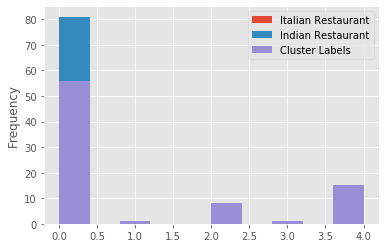

In [146]:
Queens_merged.plot(kind='hist')
plt.show()

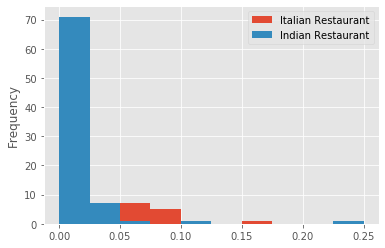

In [147]:
Queens_grouped.plot(kind='hist')
plt.show()